# Harris Corners Detection

Submitted by: Ephi Frankel



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread
from scipy.signal import correlate2d 

#global def
def filter2D(img_in, kernel):
    
    # check kernel dimensions
    ker_h, ker_w = kernel.shape
    if ker_h != ker_w:
        raise ValueError('expected square-size kernel')
    if ker_h%2==0:
        raise ValueError('expected odd-size kernel')   
    n = int((ker_h-1)/2)
   
  
    # [your code here...]
    w = (img_in.shape[0] + 2*n)
    
    h = (img_in.shape[1] + 2*n)
    img_tmp = np.zeros((w,h))
    img_tmp[n:-n,n:-n] = img_in
    x_end = img_in.shape[0]+1
    y_end = img_in.shape[1]+1
    img_out = np.zeros((img_in.shape[0],img_in.shape[1]))
    for x in range(n,x_end):
        for y in range(n,y_end):
            img_out[x-n,y-n] = (img_tmp[x-n:x-n+ker_h,y-n:y-n+ker_w]*kernel).sum()
    return img_out

In this exercise we implement Harris Corners Detectors, following these steps:

1. Compute image gradients: Gx, Gy
2. Compute products: Gx*Gx, Gx*Gy, Gy*Gy
3. Filter products with a Gaussian window
4. For each pixel (i,j) define the matrix M 
5. For each pixel compute the score R
6. Threshold R, and perform non-maxima suppression


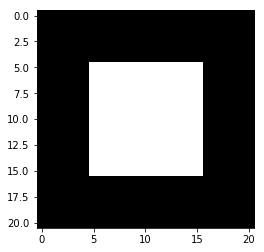

In [2]:
# lets start with some trivial image:
img = np.zeros((21,21))
img[5:-5,5:-5] = 100
plt.imshow(img, cmap='gray',interpolation='nearest')
plt.show()

### Step 1: Compute image gradients: Gx, Gy:

Use Sobel operators to calculate image gradients. Display the results.

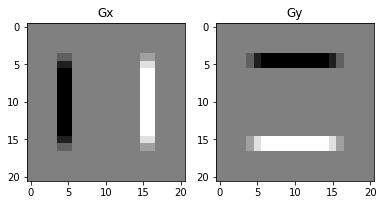

In [3]:
# your code here..
# 3x3 Sobel operators (Sx and Sy) to calculate Gx and Gy. 
SxWithSmooth = np.array([[1,0,-1],
              [2,0,-2],
              [1,0,-1]])
SyWithSmooth = SxWithSmooth.T
Gx = filter2D(img, SxWithSmooth)
Gy = filter2D(img, SyWithSmooth)
imgs = [Gx,Gy]
imgNames = ['Gx','Gy']
plt.figure(figsize=(13,7))
pltNumber = 1
for i,img_t in enumerate(imgs):
    plt.subplot(1,4,pltNumber)
    plt.imshow(img_t,cmap='gray')
    plt.title('{}'.format(imgNames[i]))
    pltNumber = pltNumber + 1
plt.show()


### Step 2: Compute products: GxGx, GyGy, GxGy

and display the results..

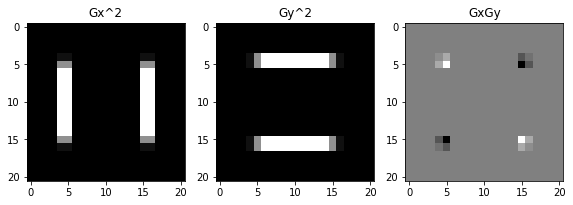

In [4]:
GxPow2 = Gx**2
GyPow2 = Gy**2
GxGy = Gx*Gy
imgs = [GxPow2,GyPow2,GxGy]
imgNames = ['Gx^2','Gy^2','GxGy']
plt.figure(figsize=(13,7))
pltNumber = 1
for i,img_t in enumerate(imgs):
    plt.subplot(1,4,pltNumber)
    plt.imshow(img_t,cmap='gray')
    plt.title('{}'.format(imgNames[i]))
    pltNumber = pltNumber + 1
plt.show()

### Step 3: Filter products with a Gaussian window


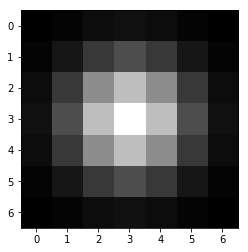

In [5]:
def gaussian(n,sigma):
    # generates a Gaussian kernel of size (2n+1)*(2n+1)
    x = np.arange(-n,n+1)
    y = np.arange(-n,n+1)
    xx, yy = np.meshgrid(x,y)
    z = np.exp(-(xx**2+yy**2)/(2*sigma**2))
    z = z/z.sum()
    return z
               
gaussian_kernel = gaussian(3,1.3)            
plt.imshow(gaussian_kernel,interpolation='nearest',cmap='gray')
plt.show()

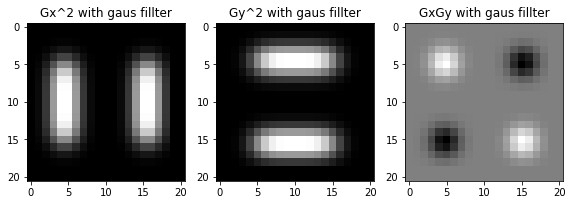

In [6]:
# your code here..
m11 = filter2D(GxPow2, gaussian_kernel)
m22 = filter2D(GyPow2, gaussian_kernel)
m12 = filter2D(GxGy, gaussian_kernel)
# display the results
imgs = [m11,m22,m12]
imgNames = ['Gx^2 with gaus fillter','Gy^2 with gaus fillter','GxGy with gaus fillter']
plt.figure(figsize=(13,7))
pltNumber = 1
for i,img_t in enumerate(imgs):
    plt.subplot(1,4,pltNumber)
    plt.imshow(img_t,cmap='gray')
    plt.title('{}'.format(imgNames[i]))
    pltNumber = pltNumber + 1
plt.show()

### Steps 4+5: For each pixel $(i,j)$ calculate its Harris score R:


$R(i,j)=\mathtt{det}(M)-0.06\cdot[\mathtt{tr}(M)]^2$

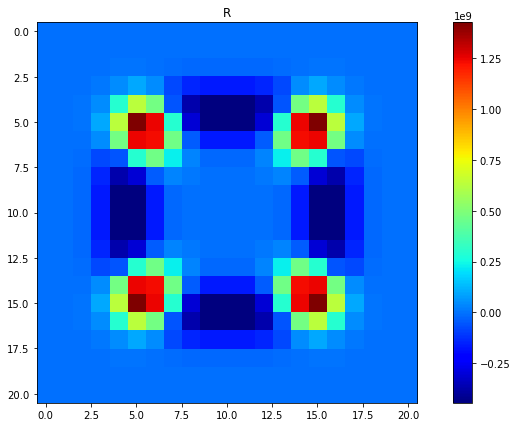

In [7]:
# your code here..
# (try to avoid using loops here if you can..)
det_M = m11*m22-m12*m12
tr_M = m11+m22
alpha = 0.06
R = det_M - alpha*(tr_M**2)
# display the resulting matrix R (with a matching colorbar)
plt.figure(figsize=(13,7))
plt.imshow(R,cmap='jet')
plt.colorbar()
plt.title('R')
plt.show()

### Step 6A: Threshold R
choose a threshold level and use it to threshold the matrix R. display the results. 

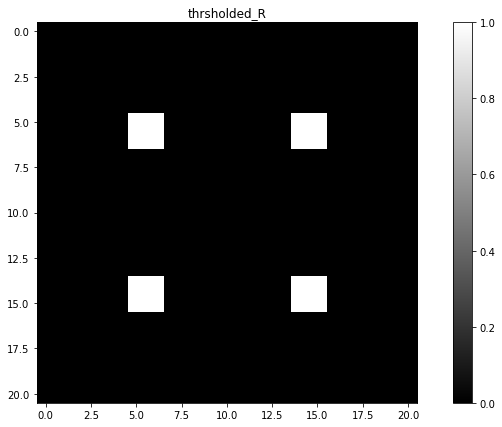

In [8]:
# your code here..
maximum = R.max()
thrshold = 0.8 * maximum
thrsholded_R = R > thrshold
plt.figure(figsize=(13,7))
plt.imshow(thrsholded_R,cmap='gray')
plt.colorbar()
plt.title('thrsholded_R')
plt.show()

### Step 6B: non-maxima suppression (NMS)
perform non-maxima suppression on the result.

mark the final selected pixels (Harris Corners) on top of the original image (np.nonzero might come handy..)

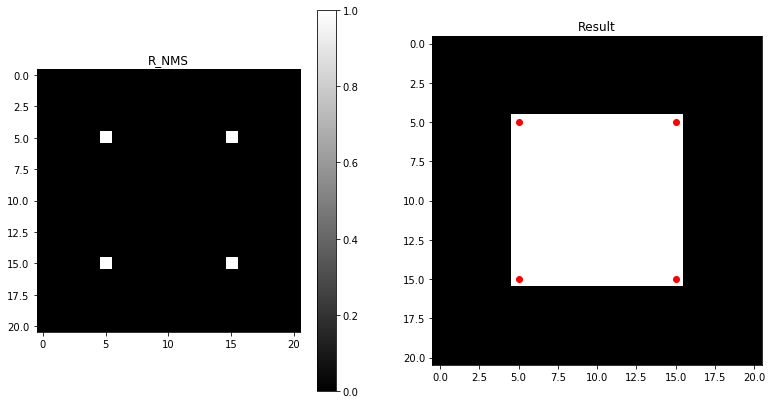

In [9]:
# your code here..
R_N = np.zeros_like(R)  # the North neighbor
R_N[1:,:] = R[:-1,:]
R_S = np.zeros_like(R)  # the South neighbor
R_S[1:,:] = R[:-1,:]
R_W = np.zeros_like(R)  # the West neighbor
R_W[:,1:] = R[:,:-1]
R_E = np.zeros_like(R)  # the East neighbor
R_E[:,:-1] = R[:,1:]
R_NE = np.zeros_like(R)  # the North East neighbor
R_NE[1:,:-1] = R[:-1,1:]
R_NW = np.zeros_like(R)  # the North West neighbor
R_NW[1:,1:] = R[:-1,:-1]
R_SW = np.zeros_like(R)  # the South West neighbor
R_SW[:-1,1:] = R[1:,:-1]
R_SE = np.zeros_like(R)  # the South East neighbor
R_SE[:-1,:-1] = R[1:,1:]
msk = np.zeros_like(R)  # Init msk matrix
msk =  (R_S<R) * (R_E<R) * (R_NW<R) * (R_SE<R) * (R_N<R) * (R_S<R) * (R_NE<R) * (R_SW<R)

R_NMS = np.zeros_like(R)
R_NMS[msk] = thrsholded_R[msk]

plt.figure(figsize=(13,7))
plt.subplot(1,2,1)
plt.imshow(R_NMS,cmap='gray')
plt.colorbar()
plt.title('R_NMS')
plt.subplot(1,2,2)
img = np.zeros((21,21))
cordinates  = np.nonzero(R_NMS)
img[5:-5,5:-5] = 100
y,x = np.nonzero(R_NMS)
plt.imshow(img, cmap='gray',interpolation='nearest')
plt.plot(x,y,'or')
plt.title('Result')
plt.show()



## Lets try it on some real images..

pick 3 images (either from our moodle or pick your own)

for each image, perform Harris corner detection. 
play with the free parameters (Gaussian, threshold level) until you find a satisfactory result.

plot your resuls along with the choosen parameters used to generate each of them.

## Good Luck!

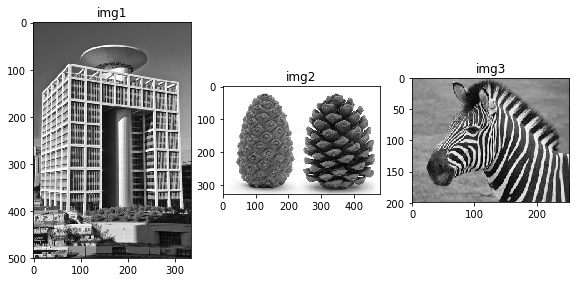

In [10]:
img1 = imread('kiria.jpg','L')
img2 = imread('pine.png','L')
img3 = imread('zebra.jpeg','L')
imgs = [img1,img2,img3]
imgNames = ['img1','img2','img3']
plt.figure(figsize=(13,7))
pltNumber = 1
for i,img_t in enumerate(imgs):
    plt.subplot(1,4,pltNumber)
    plt.imshow(img_t,cmap='gray')
    plt.title('{}'.format(imgNames[i]))
    pltNumber = pltNumber + 1
plt.show()

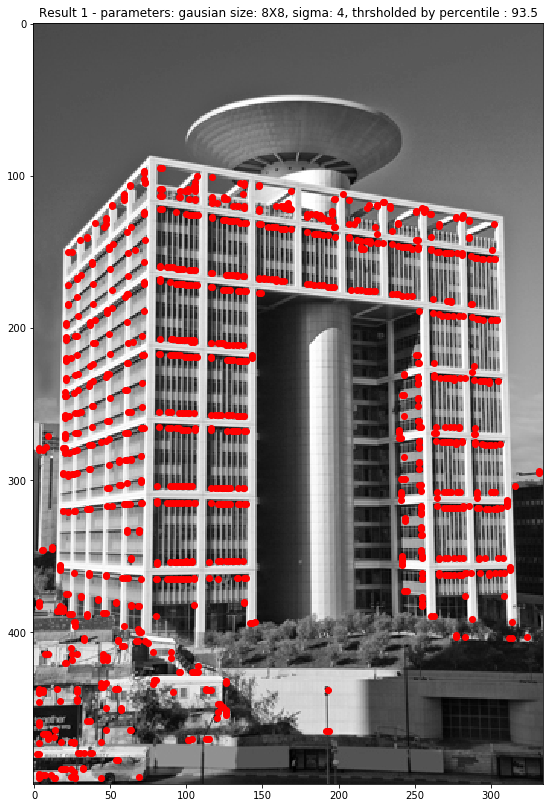

In [11]:
def show(imgs,imgNames):
    plt.figure(figsize=(13,7))
    pltNumber = 1
    for i,img_t in enumerate(imgs):
        plt.subplot(1,4,pltNumber)
        plt.imshow(img_t,cmap='gray')
        plt.title('{}'.format(imgNames[i]))
        pltNumber = pltNumber + 1
    plt.show()
def harris_corner_detector(img,gaussian_kernel,percentage,debug = False,usePercentile = False):
    SxWithSmooth = np.array([[1,0,-1],
              [2,0,-2],
              [1,0,-1]])
    SyWithSmooth = SxWithSmooth.T
    Gx = filter2D(img, SxWithSmooth)
    Gy = filter2D(img, SyWithSmooth)
    if(debug):
        imgs = [Gx,Gy]
        imgNames = ['Gx','Gy']  
        show(imgs,imgNames)
    GxPow2 = Gx**2
    GyPow2 = Gy**2
    GxGy = Gx*Gy
    if(debug):
        imgs = [GxPow2,GyPow2,GxGy]
        imgNames = ['Gx^2','Gy^2','GxGy'] 
        show(imgs,imgNames)
    m11 = filter2D(GxPow2, gaussian_kernel)
    m22 = filter2D(GyPow2, gaussian_kernel)
    m12 = filter2D(GxGy, gaussian_kernel)
    if(debug):
        imgs = [m11,m22,m12]
        imgNames = ['Gx^2 with gaus fillter','Gy^2 with gaus fillter','GxGy with gaus fillter'] 
        show(imgs,imgNames)
    det_M = m11*m22-m12*m12
    tr_M = m11+m22
    alpha = 0.06
    R = det_M - alpha*(tr_M**2)
    if(debug):
        plt.figure(figsize=(13,7))
        plt.imshow(R,cmap='jet')
        plt.colorbar()
        plt.title('R')
        plt.show()
    if(usePercentile):
        thrshold = np.percentile(R,percentage)
    else:
        maximum = R.max()
        thrshold = percentage * maximum
    thrsholded_R = R > thrshold
    if(debug):
        plt.figure(figsize=(13,7))
        plt.imshow(thrsholded_R,cmap='gray')
        plt.colorbar()
        plt.title('thrsholded_R')
        plt.show()
    R_N = np.zeros_like(R)  # the North neighbor
    R_N[1:,:] = R[:-1,:]
    R_S = np.zeros_like(R)  # the South neighbor
    R_S[1:,:] = R[:-1,:]
    R_W = np.zeros_like(R)  # the West neighbor
    R_W[:,1:] = R[:,:-1]
    R_E = np.zeros_like(R)  # the East neighbor
    R_E[:,:-1] = R[:,1:]
    R_NE = np.zeros_like(R)  # the North East neighbor
    R_NE[1:,:-1] = R[:-1,1:]
    R_NW = np.zeros_like(R)  # the North West neighbor
    R_NW[1:,1:] = R[:-1,:-1]
    R_SW = np.zeros_like(R)  # the South West neighbor
    R_SW[:-1,1:] = R[1:,:-1]
    R_SE = np.zeros_like(R)  # the South East neighbor
    R_SE[:-1,:-1] = R[1:,1:]
    msk = np.zeros_like(R)  # Init msk matrix
    msk =  (R_S<R) * (R_E<R) * (R_NW<R) * (R_SE<R) * (R_N<R) * (R_S<R) * (R_NE<R) * (R_SW<R)

    R_NMS = np.zeros_like(R)
    R_NMS[msk] = thrsholded_R[msk]
    if(debug):
        plt.imshow(R_NMS,cmap='gray')
        plt.colorbar()
        plt.title('R_NMS')
    return np.nonzero(R_NMS)

tr_mode1 = True
gausSize1 = 3
gausSigma1 = 4
tr_number1 = 93.5
gaussian_kernel_1 = gaussian(gausSize1,gausSigma1) 
y1,x1 = harris_corner_detector(img1,gaussian_kernel_1,tr_number1,False,tr_mode1)


trModeTxtPercentile = 'thrsholded by percentile : {}'
trModeTxtPercentageFromMaximum = 'thrsholded by {}% from maximum'
rsltTxt = 'Result {} - parameters: gausian size: {}X{}, sigma: {}, {}'
plt.figure(figsize=(20,14))
plt.imshow(img1, cmap='gray',interpolation='nearest')
plt.plot(x1,y1,'or')
trModeTxtPercentile1 = trModeTxtPercentile.format(tr_number1)
trModeTxtPercentageFromMaximum1 = trModeTxtPercentageFromMaximum.format(tr_number1*100)
trModeTxtDesc = trModeTxtPercentile1
if(tr_mode1 == False):
    trModeTxtDesc = trModeTxtPercentageFromMaximum1
rsltTxt1 = rsltTxt.format('1',gausSigma1*2,gausSigma1*2,gausSigma1,trModeTxtDesc)
plt.title(rsltTxt1.format(trModeTxtDesc))
plt.show()

    

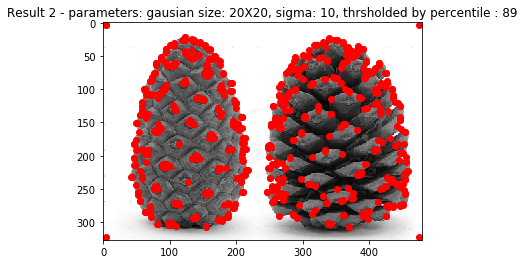

In [12]:
tr_mode2 = True
gausSize2 = 4
gausSigma2 = 10
tr_number2 = 89
gaussian_kernel_2 = gaussian(gausSize2,gausSigma2) 
y2,x2 = harris_corner_detector(img2,gaussian_kernel_2,tr_number2,False,tr_mode2)

plt.imshow(img2, cmap='gray',interpolation='nearest')
plt.plot(x2,y2,'or')
trModeTxtPercentile2 = trModeTxtPercentile.format(tr_number2)
trModeTxtPercentageFromMaximum2 = trModeTxtPercentageFromMaximum.format(tr_number2*100)
trModeTxtDesc = trModeTxtPercentile2
if(tr_mode1 == False):
    trModeTxtDesc = trModeTxtPercentageFromMaximum2
rsltTxt2 = rsltTxt.format('2',gausSigma2*2,gausSigma2*2,gausSigma2,trModeTxtDesc)
plt.title(rsltTxt2.format(trModeTxtDesc))
plt.show()

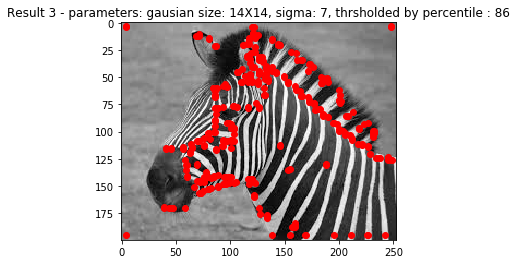

In [13]:
tr_mode3 = True
gausSize3 = 3
gausSigma3 = 7
tr_number3 = 86
gaussian_kernel_3 = gaussian(gausSize3,gausSigma3) 
y3,x3 = harris_corner_detector(img3,gaussian_kernel_2,tr_number3,False,tr_mode3)

plt.imshow(img3, cmap='gray',interpolation='nearest')
plt.plot(x3,y3,'or')
trModeTxtPercentile3 = trModeTxtPercentile.format(tr_number3)
trModeTxtPercentageFromMaximum3 = trModeTxtPercentageFromMaximum.format(tr_number3*100)
trModeTxtDesc = trModeTxtPercentile3
if(tr_mode1 == False):
    trModeTxtDesc = trModeTxtPercentageFromMaximum3
rsltTxt2 = rsltTxt.format('3',gausSigma3*2,gausSigma3*2,gausSigma3,trModeTxtDesc)
plt.title(rsltTxt2.format(trModeTxtDesc))
plt.show()